In [1]:
import random 
import numpy as np
import pandas as pd
from numpy import random
import os, sys
import matplotlib.pyplot as plt
import glob # utils for reading multiple files from folder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 ## Gas  data loading

In [44]:
#!pip3 install glob2

In [2]:
path='./MasterProjectCode/gas_data/'
#data_list = os.listdir('./gas_data')
#path = 'C/data/gas_data/'
all_files = glob.glob(path + "*.csv")
df_list = []
for file in all_files:
    #print(file)
    df = pd.read_csv(file, header= 0,  index_col=False)
    df.reset_index(inplace=True)
    df.drop(['index','Time (s)'], inplace=True, axis=1)  # remove index for now
    #df.drop(['index'], inplace=True, axis = 1)
    df.columns = [''] * len(df.columns)
    df_list.append(df)
df = pd.concat(df_list)
df.columns = [x for x in range(0, len(df.columns))]

print('Number of features or sensors {}'.format(df.shape[1]))
print('Number of observations {}'.format(df.shape[0]))

Number of features or sensors 19
Number of observations 2069321


## Normalizing the data

In [89]:
max_value = np.max(df, axis=1)
min_value = np.min(df, axis=1)
df = (np.transpose(df) - min_value)/(max_value - min_value + 1e-6)
df = np.transpose(df) 
df.shape

(2069321, 19)

In [90]:
df = pd.DataFrame(df)

In [91]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.213283,0.101676,1.0,0.003855,0.000956,0.002729,0.004927,0.003637,0.005373,0.006194,0.008533,0.005703,0.006207,0.008208,0.014854,0.022353,0.028210,0.037032
1,0.0,0.231095,0.110167,1.0,0.000874,0.008821,0.022163,0.040379,0.026150,0.039097,0.043773,0.056415,0.090977,0.067003,0.100475,0.128714,0.143687,0.131400,0.173473
2,0.0,0.231328,0.110279,1.0,0.000858,0.043630,0.093464,0.154371,0.073677,0.137001,0.150446,0.176374,0.206097,0.131544,0.239153,0.222162,0.235807,0.198126,0.260756
3,0.0,0.231561,0.110390,1.0,0.000847,0.122643,0.205316,0.272166,0.108419,0.242113,0.279967,0.282013,0.245836,0.152530,0.274038,0.277155,0.277713,0.208890,0.268867
4,0.0,0.231786,0.110497,1.0,0.000843,0.205515,0.278262,0.323071,0.116069,0.297923,0.331853,0.331503,0.259591,0.164488,0.282859,0.257748,0.205309,0.219355,0.277464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295695,0.0,0.784508,0.331148,0.0,0.002512,0.837701,0.937642,1.000000,0.393394,0.876075,0.999034,0.997981,0.781490,0.627834,0.878924,0.792304,0.849818,0.629468,0.868271
295696,0.0,0.813117,0.343224,0.0,0.002598,0.874310,0.962897,1.000000,0.402376,0.872554,0.961361,0.988488,0.828641,0.646456,0.855899,0.827739,0.860221,0.640825,0.907893
295697,0.0,0.879423,0.371212,0.0,0.002802,0.878119,1.000000,0.969674,0.422742,0.896139,0.945723,0.999332,0.862684,0.725353,0.919371,0.895238,0.897041,0.693082,0.973320
295698,0.0,0.878234,0.370710,0.0,0.002801,0.801822,0.937782,0.932133,0.405360,0.845498,0.867121,0.882495,0.817290,0.767864,1.000000,0.899999,0.851698,0.684270,0.964953


## Adding random noise to data

In [92]:
def create_anomaly(data, start_index=100,  duration=60, series_num=0):
    base_value = data.iloc[start_index, series_num]
    data.iloc[start_index:start_index + duration, series_num] = base_value \
    +  np.random.normal(loc=0, scale=0.8, size=duration)

In [93]:
start_idx_list = [300, 1200, 2000]
periods_list = [20, 60, 60]
sensor_list = [1, 16, 18]
for start_idx, period, sensor in zip(start_idx_list, periods_list, sensor_list):
    create_anomaly(df, start_idx, period, sensor)

In [94]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.213283,0.101676,1.0,0.003855,0.000956,0.002729,0.004927,0.003637,0.005373,0.006194,0.008533,0.005703,0.006207,0.008208,0.014854,0.022353,0.028210,0.037032
1,0.0,0.231095,0.110167,1.0,0.000874,0.008821,0.022163,0.040379,0.026150,0.039097,0.043773,0.056415,0.090977,0.067003,0.100475,0.128714,0.143687,0.131400,0.173473
2,0.0,0.231328,0.110279,1.0,0.000858,0.043630,0.093464,0.154371,0.073677,0.137001,0.150446,0.176374,0.206097,0.131544,0.239153,0.222162,0.235807,0.198126,0.260756
3,0.0,0.231561,0.110390,1.0,0.000847,0.122643,0.205316,0.272166,0.108419,0.242113,0.279967,0.282013,0.245836,0.152530,0.274038,0.277155,0.277713,0.208890,0.268867
4,0.0,0.231786,0.110497,1.0,0.000843,0.205515,0.278262,0.323071,0.116069,0.297923,0.331853,0.331503,0.259591,0.164488,0.282859,0.257748,0.205309,0.219355,0.277464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295695,0.0,0.784508,0.331148,0.0,0.002512,0.837701,0.937642,1.000000,0.393394,0.876075,0.999034,0.997981,0.781490,0.627834,0.878924,0.792304,0.849818,0.629468,0.868271
295696,0.0,0.813117,0.343224,0.0,0.002598,0.874310,0.962897,1.000000,0.402376,0.872554,0.961361,0.988488,0.828641,0.646456,0.855899,0.827739,0.860221,0.640825,0.907893
295697,0.0,0.879423,0.371212,0.0,0.002802,0.878119,1.000000,0.969674,0.422742,0.896139,0.945723,0.999332,0.862684,0.725353,0.919371,0.895238,0.897041,0.693082,0.973320
295698,0.0,0.878234,0.370710,0.0,0.002801,0.801822,0.937782,0.932133,0.405360,0.845498,0.867121,0.882495,0.817290,0.767864,1.000000,0.899999,0.851698,0.684270,0.964953


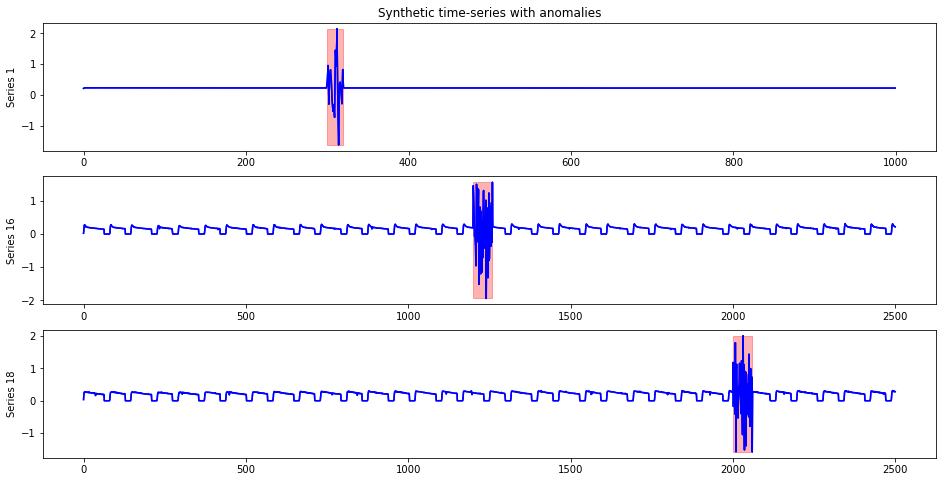

In [95]:
fig, ax = plt.subplots(3,1, figsize=(16,8))
ax[0].set_title('Synthetic time-series with anomalies')
ax[0].plot(df.iloc[0:1000,1], color='blue')
ax[0].fill_between(np.arange(300,300+20), y1=min(df.iloc[:,1]), y2=max(df.iloc[:,1]), color='red', alpha=0.3)
ax[0].plot(df.iloc[0:1000,1], color='blue')
ax[0].set_ylabel('Series 1')
# add anomalies to senor root 16
ax[1].plot(df.iloc[0:2500,16], color='blue')
ax[1].fill_between(np.arange(1200,1200+60), y1=min(df.iloc[:,16]), y2=max(df.iloc[:,16]), color='red', alpha=0.3)
ax[1].plot(df.iloc[0:2500,16], color='blue')
ax[1].set_ylabel('Series 16')

# add anomalies to senor root 18
ax[2].plot(df.iloc[0:2500,18], color='blue')
ax[2].fill_between(np.arange(2000,2000+60), y1=min(df.iloc[:,18]), y2=max(df.iloc[:,18]), color='red', alpha=0.3)
ax[2].plot(df.iloc[0:2500,18], color='blue')
ax[2].set_ylabel('Series 18')
plt.show()

In [103]:
#df.iloc[299:350,1]

In [100]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.213283,0.101676,1.0,0.003855,0.000956,0.002729,0.004927,0.003637,0.005373,0.006194,0.008533,0.005703,0.006207,0.008208,0.014854,0.022353,0.028210,0.037032
1,0.0,0.231095,0.110167,1.0,0.000874,0.008821,0.022163,0.040379,0.026150,0.039097,0.043773,0.056415,0.090977,0.067003,0.100475,0.128714,0.143687,0.131400,0.173473
2,0.0,0.231328,0.110279,1.0,0.000858,0.043630,0.093464,0.154371,0.073677,0.137001,0.150446,0.176374,0.206097,0.131544,0.239153,0.222162,0.235807,0.198126,0.260756
3,0.0,0.231561,0.110390,1.0,0.000847,0.122643,0.205316,0.272166,0.108419,0.242113,0.279967,0.282013,0.245836,0.152530,0.274038,0.277155,0.277713,0.208890,0.268867
4,0.0,0.231786,0.110497,1.0,0.000843,0.205515,0.278262,0.323071,0.116069,0.297923,0.331853,0.331503,0.259591,0.164488,0.282859,0.257748,0.205309,0.219355,0.277464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295695,0.0,0.784508,0.331148,0.0,0.002512,0.837701,0.937642,1.000000,0.393394,0.876075,0.999034,0.997981,0.781490,0.627834,0.878924,0.792304,0.849818,0.629468,0.868271
295696,0.0,0.813117,0.343224,0.0,0.002598,0.874310,0.962897,1.000000,0.402376,0.872554,0.961361,0.988488,0.828641,0.646456,0.855899,0.827739,0.860221,0.640825,0.907893
295697,0.0,0.879423,0.371212,0.0,0.002802,0.878119,1.000000,0.969674,0.422742,0.896139,0.945723,0.999332,0.862684,0.725353,0.919371,0.895238,0.897041,0.693082,0.973320
295698,0.0,0.878234,0.370710,0.0,0.002801,0.801822,0.937782,0.932133,0.405360,0.845498,0.867121,0.882495,0.817290,0.767864,1.000000,0.899999,0.851698,0.684270,0.964953


## saving the data to  csv file

In [104]:
df.to_csv('gas_data_abnr.csv', index=None, header=None)